<a href="https://colab.research.google.com/github/allan-gon/Daily-Warm-Ups/blob/master/unit-2/sprint1/u2s1m2_regression2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<!--
Author: Brian Thomas Ross
License: BSD-3-Clause
-->
<u>U2S1M2 WARM UP</u>
=====================

Welcome to Unit 2 Predictive modeling, partner up in your TL groups. When you've assembled in your zoom calls be sure to pull the changes to the `Daily-Warm-Ups` repo to your fork. Work together to complete the warm up assignment.

## <u>Define the following terms:</u>

---

### Supervised Learning

The training of a machine learning model with labeled data or data that maps input to output like the regression we did yesterday

### Regression

Estimating the relationship between variables(thats the corr coef and the line)



### Classification

A machine learning model that tries to put data in a class

### Heuristic

is a technique designed for solving a problem more quickly when classic methods are too slow think A* search

### Descriptive Statistics

stats that describe features in the data rather than try to explain the data

----

### What should you always begin with when constructing a predictive model?

IS it supervised or unsupervised, find a baseline

### How should one interpret the coefficients in a linear regression model?

In regression with multiple independent variables, the coefficient tells you how much the dependent variable is expected to increase when that independent variable increases by one, holding all the other independent variables constant. THis is what  the function yeterdays teach made in his functin during lecture

----

### Read [this article](https://towardsdatascience.com/scikit-learn-design-principles-d1371958059b) which gives a brief overview of the design principles employed in sklearn.

#### Share in slack something your group found interesting in the article

----

## <u>Code</u>

Use the rest of the time before lecture to explore and familiarize yourself with the following dataset using the techniques you learned during Unit 1

In [2]:
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Applied-Modeling/master/data/'

# If you're working locally:
else:
    DATA_PATH = '../data/'
    
# Ignore this Numpy warning when using Plotly Express:
# FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning, module='numpy')

In [3]:
import pandas as pd
df = pd.read_csv(DATA_PATH+'elections/bread_peace_voting.csv')
df

,Year,Incumbent Party Candidate,Other Candidate,Average Recent Growth in Personal Incomes,US Military Fatalities per Million,Incumbent Party Vote Share
0,1952,Stevenson,Eisenhower,2.40,190,44.60
1,1956,Eisenhower,Stevenson,2.89,0,57.76
2,1960,Nixon,Kennedy,0.85,0,49.91
3,1964,Johnson,Goldwater,4.21,1,61.34
4,1968,Humphrey,Nixon,3.02,146,49.60
5,1972,Nixon,McGovern,3.62,0,61.79
6,1976,Ford,Carter,1.08,2,48.95
7,1980,Carter,Reagan,-0.39,0,44.70
8,1984,Reagan,Mondale,3.86,0,59.17
9,1988,"Bush, Sr.",Dukakis,2.27,0,53.94


In [4]:
df.describe()

,Year,Average Recent Growth in Personal Incomes,US Military Fatalities per Million,Incumbent Party Vote Share
count,17.00000,17.000000,17.000000,17.000000
mean,1984.00000,1.791765,21.588235,51.828235
std,20.19901,1.419812,55.767440,5.510739
min,1952.00000,-0.390000,0.000000,44.600000
25%,1968.00000,0.850000,0.000000,48.200000
50%,1984.00000,1.720000,0.000000,50.270000
75%,2000.00000,2.890000,5.000000,54.740000
max,2016.00000,4.210000,190.000000,61.790000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 6 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Year                                       17 non-null     int64  
 1   Incumbent Party Candidate                  17 non-null     object 
 2   Other Candidate                            17 non-null     object 
 3   Average Recent Growth in Personal Incomes  17 non-null     float64
 4   US Military Fatalities per Million         17 non-null     int64  
 5   Incumbent Party Vote Share                 17 non-null     float64
dtypes: float64(2), int64(2), object(2)
memory usage: 944.0+ bytes


In [7]:
df.corr()

,Year,Average Recent Growth in Personal Incomes,US Military Fatalities per Million,Incumbent Party Vote Share
Year,1.000000,-0.506036,-0.429226,-0.219182
Average Recent Growth in Personal Incomes,-0.506036,1.000000,0.204632,0.766281
US Military Fatalities per Million,-0.429226,0.204632,1.000000,-0.364377
Incumbent Party Vote Share,-0.219182,0.766281,-0.364377,1.000000


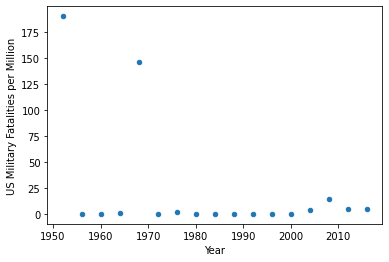

In [12]:
df.plot.scatter('Year','US Military Fatalities per Million');

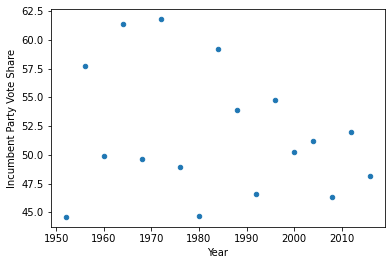

In [13]:
df.plot.scatter('Year','Incumbent Party Vote Share');

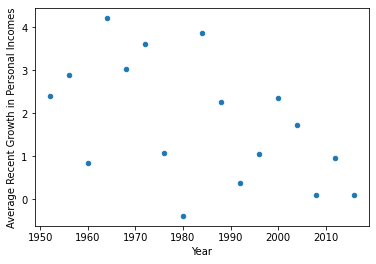

In [15]:
df.plot.scatter('Year','Average Recent Growth in Personal Incomes');

In [31]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

temp = df.copy()
temp.drop(['Incumbent Party Candidate','Other Candidate'],axis=1,inplace=True)

kmeans = KMeans(3)
kmeans.fit(temp)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [32]:
temp['clus no pca'] = kmeans.labels_

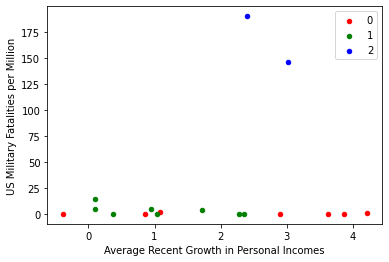

In [33]:
import matplotlib.pyplot as plt

grouped = temp.groupby('clus no pca')
colors = {0:'r',1:'g',2:'b'}

fig, ax = plt.subplots()

for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='Average Recent Growth in Personal Incomes', y='US Military Fatalities per Million', label=key, color=colors[key])
plt.show()

In [28]:
temp.head()

,Year,Average Recent Growth in Personal Incomes,US Military Fatalities per Million,Incumbent Party Vote Share,clus no pca
0,1952,2.40,190,44.60,1
1,1956,2.89,0,57.76,0
2,1960,0.85,0,49.91,0
3,1964,4.21,1,61.34,0
4,1968,3.02,146,49.60,1
